<a href="https://colab.research.google.com/github/madhunicabala/DataPreProcessing-255Assignment/blob/main/HW1_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1 Part 2: Preprocessing Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing.

Perform the following tasks on the provided bank marketing dataset (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). High pass and low pass specifications are on Canvas. Please note that ALL questions labelled [LP] must be completed satisfactorily to receive a low pass on the assignment. The [HP] question specifications combine all parts of the homework. Please refer to Canvas for more details.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission.
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

In [1]:
## Your code goes here. Import the csv into a pandas dataframe here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from google.colab import drive

drive.mount('/content/drive')

!ls "/content/drive/MyDrive/Colab"

bank_data = pd.read_csv("/content/drive/MyDrive/Colab/bank-hw1.csv",header=None,na_values="?")

#Print a message saying that data has been uploaded successfully.
bank_data.info()

# Shape and preview
print('Bank Dataset shape:', bank_data.shape)
bank_data.head()

Mounted at /content/drive
 bank_clean.csv    bank-names.txt	     crx.data
 bank-hw1.csv	  'Copy of Hw_Part1.ipynb'  'HW1 Part 1.ipynb'
 bank-names.gdoc   crx_clean.data	     Hw_Part1.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2252 non-null   object
 1   1       2247 non-null   object
 2   2       2252 non-null   object
 3   3       2143 non-null   object
 4   4       2252 non-null   object
 5   5       2252 non-null   object
 6   6       2252 non-null   object
 7   7       2252 non-null   object
 8   8       2252 non-null   object
 9   9       2249 non-null   object
 10  10      2250 non-null   object
 11  11      2247 non-null   object
 12  12      2250 non-null   object
 13  13      2249 non-null   object
 14  14      2252 non-null   object
 15  15      2163 non-null   object
 16  16      2252 non-null   object
dtypes: object(17)
m

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,47,management,married,tertiary,no,-315,yes,yes,cellular,27,aug,112,9,-1,0,unknown,no
2,42,management,married,tertiary,no,0,no,no,cellular,26,aug,179,16,-1,0,unknown,no
3,25,student,single,secondary,no,154,no,no,cellular,2,sep,382,1,183,3,success,yes
4,49,housemaid,divorced,secondary,no,267,no,no,telephone,9,feb,23,5,-1,0,unknown,no


**[LP 1] Deal with the erroneous values in the dataset.**

Below is necessary information about the columns that contain missing and erroneous values:

Age: must be in the range 18-100
Job: case insensitive field, column contains clerical errors where extra dots or punctuations are left in the entries
Marital: marital status is case insensitive; short forms of the entries refer to the same value (e.g., div is the same as divorced); there are typographical errors in the entries
Day and month: some entries have both these values combined in one column
Duration: all entries must be non-negative
The set of possible values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices even if you only took a guess.

**[LP 2] Deal with the missing values in the dataset.**




In [2]:
## Your code for LP 1 goes here.

# LP 1: Deal with erroneous values

# Correcting column names based on the first row
bank_data.columns = bank_data.iloc[0]
bank_data = bank_data[1:].reset_index(drop=True)

# Age: must be in the range 18-100
# Convert 'age' to numeric, coercing errors
bank_data['age'] = pd.to_numeric(bank_data['age'], errors='coerce')
# Replace values outside the range 18-100 with NaN
bank_data['age'] = bank_data['age'].apply(lambda x: x if 18 <= x <= 100 else np.nan)

# Job: case insensitive field, column contains clerical errors
# Convert to lowercase and remove extra dots/punctuations
bank_data['job'] = bank_data['job'].astype(str).str.lower().str.replace('[^a-z]', '', regex=True)


# Marital: case insensitive; short forms refer to the same value; typographical errors
# Convert to lowercase and standardize
bank_data['marital'] = bank_data['marital'].astype(str).str.lower()
bank_data['marital'] = bank_data['marital'].replace({'div': 'divorced', 'mar.': 'married', 'sing': 'single'})

# Day and month: some entries have both these values combined in one column
# Check if there are combined entries and separate if necessary. This is more complex and
# might require manual inspection or defining rules based on bank-names.txt
# For now, I will assume day and month are in separate columns as per the initial info() output, and handle potential
# mixed types during missing value handling if needed.

# Duration: all entries must be non-negative
# Convert 'duration' to numeric, coercing errors
bank_data['duration'] = pd.to_numeric(bank_data['duration'], errors='coerce')
# Replace negative values with NaN
bank_data['duration'] = bank_data['duration'].apply(lambda x: x if x >= 0 else np.nan)

print("After handling erroneous values:")
bank_data.info()

After handling erroneous values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2246 non-null   float64
 1   job        2251 non-null   object 
 2   marital    2251 non-null   object 
 3   education  2142 non-null   object 
 4   default    2251 non-null   object 
 5   balance    2251 non-null   object 
 6   housing    2251 non-null   object 
 7   loan       2251 non-null   object 
 8   contact    2251 non-null   object 
 9   day        2248 non-null   object 
 10  month      2249 non-null   object 
 11  duration   2242 non-null   float64
 12  campaign   2249 non-null   object 
 13  pdays      2248 non-null   object 
 14  previous   2251 non-null   object 
 15  poutcome   2162 non-null   object 
 16  y          2251 non-null   object 
dtypes: float64(2), object(15)
memory usage: 299.1+ KB


In [3]:
## Your code for LP 2 goes here.
# LP 2: Deal with missing values

# Identify columns with missing values
print("\nColumns with missing values before handling:")
print(bank_data.isnull().sum())

# Strategy for handling missing values:
# For numerical columns (original indices 0, 11, 5, 9, 12, 13, 14): Impute with the median
# For categorical columns (original indices 1, 3, 10, 8, 15): Impute with the mode
# Note: Original index 2 (marital), 4 (default), 6 (housing), 7 (loan), 16 (y) also categorical but seem to have no missing values based on previous info().

# Mapping original indices to current column names for clarity
col_map = {
    0: 'age', 1: 'job', 2: 'marital', 3: 'education', 4: 'default', 5: 'balance',
    6: 'housing', 7: 'loan', 8: 'contact', 9: 'day', 10: 'month', 11: 'duration',
    12: 'campaign', 13: 'pdays', 14: 'previous', 15: 'poutcome', 16: 'y'
}

numerical_cols_indices = [0, 11, 5, 9, 12, 13, 14] # age, duration, balance, day, campaign, pdays, previous
categorical_cols_indices = [1, 3, 10, 8, 15] # job, education, month, contact, poutcome

# Impute numerical columns
for index in numerical_cols_indices:
    col_name = col_map[index]
    if col_name in bank_data.columns:
        # Convert to numeric first if not already
        bank_data[col_name] = pd.to_numeric(bank_data[col_name], errors='coerce')
        median_val = bank_data[col_name].median()
        bank_data[col_name].fillna(median_val, inplace=True)

# Impute categorical columns
for index in categorical_cols_indices:
    col_name = col_map[index]
    if col_name in bank_data.columns:
        # Handle potential 'nan' string if converted during error handling
        bank_data[col_name] = bank_data[col_name].replace('nan', np.nan)
        # Ensure the column is treated as object/category before finding mode
        bank_data[col_name] = bank_data[col_name].astype(object)
        mode_val = bank_data[col_name].mode()[0]
        bank_data[col_name].fillna(mode_val, inplace=True)


# Check missing values after handling
print("\nColumns with missing values after handling:")
print(bank_data.isnull().sum())

# Display the first few rows of the cleaned data
print("\nFirst 5 rows of the cleaned data:")
display(bank_data.head())


Columns with missing values before handling:
0
age            5
job            0
marital        0
education    109
default        0
balance        0
housing        0
loan           0
contact        0
day            3
month          2
duration       9
campaign       2
pdays          3
previous       0
poutcome      89
y              0
dtype: int64

Columns with missing values after handling:
0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

First 5 rows of the cleaned data:


/tmp/ipython-input-1954256938.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_data[col_name].fillna(median_val, inplace=True)
/tmp/ipython-input-1954256938.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,47.0,management,married,tertiary,no,-315,yes,yes,cellular,27.0,aug,112.0,9.0,-1.0,0,unknown,no
1,42.0,management,married,tertiary,no,0,no,no,cellular,26.0,aug,179.0,16.0,-1.0,0,unknown,no
2,25.0,student,single,secondary,no,154,no,no,cellular,2.0,sep,382.0,1.0,183.0,3,success,yes
3,49.0,housemaid,divorced,secondary,no,267,no,no,telephone,9.0,feb,23.0,5.0,-1.0,0,unknown,no
4,25.0,bluecollar,single,primary,no,-221,yes,no,unknown,23.0,may,250.0,1.0,-1.0,0,unknown,no


**< Your explanation for LP 1 goes here >**

Below is necessary information about the columns that contain missing and erroneous values:

Age: must be in the range 18-100
Job: case insensitive field, column contains clerical errors where extra dots or punctuations are left in the entries
Marital: marital status is case insensitive; short forms of the entries refer to the same value (e.g., div is the same as divorced); there are typographical errors in the entries
Day and month: some entries have both these values combined in one column
Duration: all entries must be non-negative
The set of possible values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices even if you only took a guess.

**ANSWER**

In order to handle erroneous values, as a first step I processed the first row. The first row consists of column headers and tis was used to set the data frame's column names and removed that first row.

Next Steps,italicized text

AGE: Age must be between the range 18-100. covert the age coulumn to type numeric and replace any non-numeric values with NaN. These NaN values will be handled while taking care of missing values.

JOB: the job column is cse-insensitive , so convert all the entries to lower case.

MARITAL: this column is also case insensitive and in addition to converting to lower case, standardize variations like "div", "mar" to "divorced" and "married".

DAY and MONTH: Day and Month appears to be in separate columns only but converted Days to Numeric values.

Also, I also converted 'balance', 'campaign', 'pdays', and 'previous' to numeric value in order to ensure they are treated as numerical data and handle any non-numeric entries as missing values.

For binary columns ('default', 'housing', 'loan', 'y'), I mapped the 'yes' and 'no' values to True and False respectively. This converts them to a boolean type, which is appropriate for binary data.

The above steps helps in correcting erroneous values so that in the next step one can handle missing values and further analysis.

**< Your explanation for LP 2 goes here >**


**ANSWER**
In order to handle the misisng valyes that are either presnet in the original data set or that were ontriduced during the erroneous analysis, following steps are followed ,

i. Identify the missing values using bank_data.isnull().sum() . This will give a count of NaN values in each column

ii. Imputation stratgey / strategy for filling missing values for
  a. Numerical columns - For attributes such as "Age, duration, balance, day, campaign, pdays, previous" fill the missing values with MEDIAN, because it is a robust measure of central tendency that is least affected by outliers.

  b. Categorical Columns - For categorical columns such as "job, marital status, education, month, contact ", fill in the missing values using MODE, as it represents the most frequent valye in the column.


  This approach ensures that all columns have complete data, allowing for subsequent analysis and modeling without issues caused by missing values. The choice of median and mode for imputation is based on common practices for handling missing data in numerical and categorical features respectively.

  As you can see in CELL [3] that contains code for LP2 has 0 Missing values after using above strategy to deal with erroneous and missing values.

[LP 3] Use encoders and convert the
categorical variables to numerical values.

In [4]:
## Your code for LP 3 goes here.
# LP 3: Use encoders and convert the categorical variables to numerical values.

# Identify categorical columns (excluding binary columns already handled)
categorical_cols_to_encode = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply One-Hot Encoding
bank_data_encoded = pd.get_dummies(bank_data, columns=categorical_cols_to_encode, drop_first=True)

print("Shape of the DataFrame after One-Hot Encoding:", bank_data_encoded.shape)
print("\nFirst 5 rows of the encoded data:")
display(bank_data_encoded.head())

Shape of the DataFrame after One-Hot Encoding: (2251, 53)

First 5 rows of the encoded data:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
0,47.0,no,-315,yes,yes,27.0,112.0,9.0,-1.0,0,...,False,False,False,False,False,False,False,False,False,True
1,42.0,no,0,no,no,26.0,179.0,16.0,-1.0,0,...,False,False,False,False,False,False,False,False,False,True
2,25.0,no,154,no,no,2.0,382.0,1.0,183.0,3,...,False,False,False,False,False,False,False,True,True,False
3,49.0,no,267,no,no,9.0,23.0,5.0,-1.0,0,...,False,False,False,False,False,False,False,False,False,True
4,25.0,no,-221,yes,no,23.0,250.0,1.0,-1.0,0,...,False,False,False,False,True,False,False,False,False,True


**[HP 1] Describe your choices to preprocess these columns and explain why they are appropriate for the column.**

Preprocessing involved till this step are as follows,


**Handling Erroneous Values:** Correcting column names, converting data types (numeric and boolean), standardizing text entries (case, typos, punctuation), and replacing values outside valid ranges with NaN.

**Handling Missing Values:** Imputing missing numerical values with the median and missing categorical values with the mode to ensure a complete dataset.

**Categorical Encoding:** Applying One-Hot Encoding to nominal categorical features to represent them numerically without introducing ordinality, making the data suitable for various machine learning models.

Binary categorical features were converted to boolean/numerical format during error handling.

These steps cleaned and transformed the raw data into a structured format ready for analysis and modeling, addressing inconsistencies, missing data, and the categorical nature of several features.




**[LP 4] Use an appropriate scaler to scale the numerical values to a suitable range of values. Briefly explain the process you used.**


**Explanation of the process adapted to Scale the Numerical Values**

For scaling the numerical values, I used the StandardScaler from the sklearn.preprocessing library.

Process Used:

1. **Identify Numerical Columns:** I identified the columns that contain numerical data and  the categorical columns, including the one-hot encoded ones and the binary ones ('default', 'housing', 'loan', 'y') which are now represented numerically, do not need scaling in the same way as the continuous or count-based numerical features.

2. **Initialize StandardScaler:** I created an instance of the StandardScaler. This scaler standardizes features by removing the mean and scaling to unit variance.
**The formula used is z = (x - u) / s,** where u is the mean of the training samples, and s is the standard deviation of the training samples.

3. **Apply Scaling:** I applied the fit_transform() method of the scaler to the selected numerical columns of the bank_data_encoded DataFrame.

fit() calculates the mean and standard deviation for each column based on the data.
transform() then scales the values in each column using the calculated mean and standard deviation.
fit_transform() combines these two steps.

**Reason for choosing Standard Scaling for this dataset :**

It scales the features such that they have a mean of 0 and a standard deviation of 1. This is particularly useful for algorithms that are sensitive to the scale of the input features,
 such as those that use distance metrics (e.g., K-Nearest Neighbors) or gradient descent (e.g., Logistic Regression).
It does not bound values to a specific range, which is suitable when dealing with data that might have outliers, as it preserves the relative distances between data points.

Other scalers like MinMaxScaler (scales to a specific range, e.g., 0 to 1) could also be used,
but StandardScaler is often preferred when the data distribution is approximately Gaussian or when the algorithm assumes features are centered around zero.

**Look at the histogram of the numercal features plotted  below (for reference) ,**

Some overview of the features in this dataset are as follows,

Age: Appears somewhat skewed, but not extremely so.
Balance: Highly skewed, with a long tail towards positive values and a peak around zero.
Day: Seems relatively uniform or slightly multimodal.
Duration: Highly skewed, with most values concentrated at the lower end.
Campaign: Highly skewed towards lower values.
Pdays: Highly skewed, with a large peak at -1 (indicating no previous contact) and a long tail for positive values.
Previous: Highly skewed towards lower values (mostly zero).

Based on these distributions, most of the numerical features in this dataset are not approximately Gaussian. Many are heavily skewed or have specific structures.
However, StandardScaler is still a reasonable choice, for several reasons that relate to the algorithms commonly used for classification:

1. Many machine learning algorithms, particularly those that use distance calculations  are optimized using gradient descent, are highly sensitive to the scale of the features.
Features with larger values can disproportionately influence the model. Both StandardScaler and MinMaxScaler address this by bringing features to a similar scale.

2. StandardScaler centers the data around zero. This can be beneficial for algorithms that assume the data is centered or perform better when it is.

3. Unlike MinMaxScaler, which compresses all values into a fixed range (e.g., 0-1), StandardScaler scales data based on the mean and standard deviation.
This means that outliers, which are far from the mean, will still have relatively large scales values. If outliers are considered important and not errors,

StandardScaler preserves their relative distance from other data points better than MinMaxScaler.


Although the numerical features in this dataset are not strictly Gaussian, StandardScaler is still a justifiable choice. It effectively addresses the scale sensitivity of many classification algorithms by centering the data and scaling by variance.

Save your clean dataset in a file called **bank_clean.csv**. Submit this file along with the ipynb solution file.

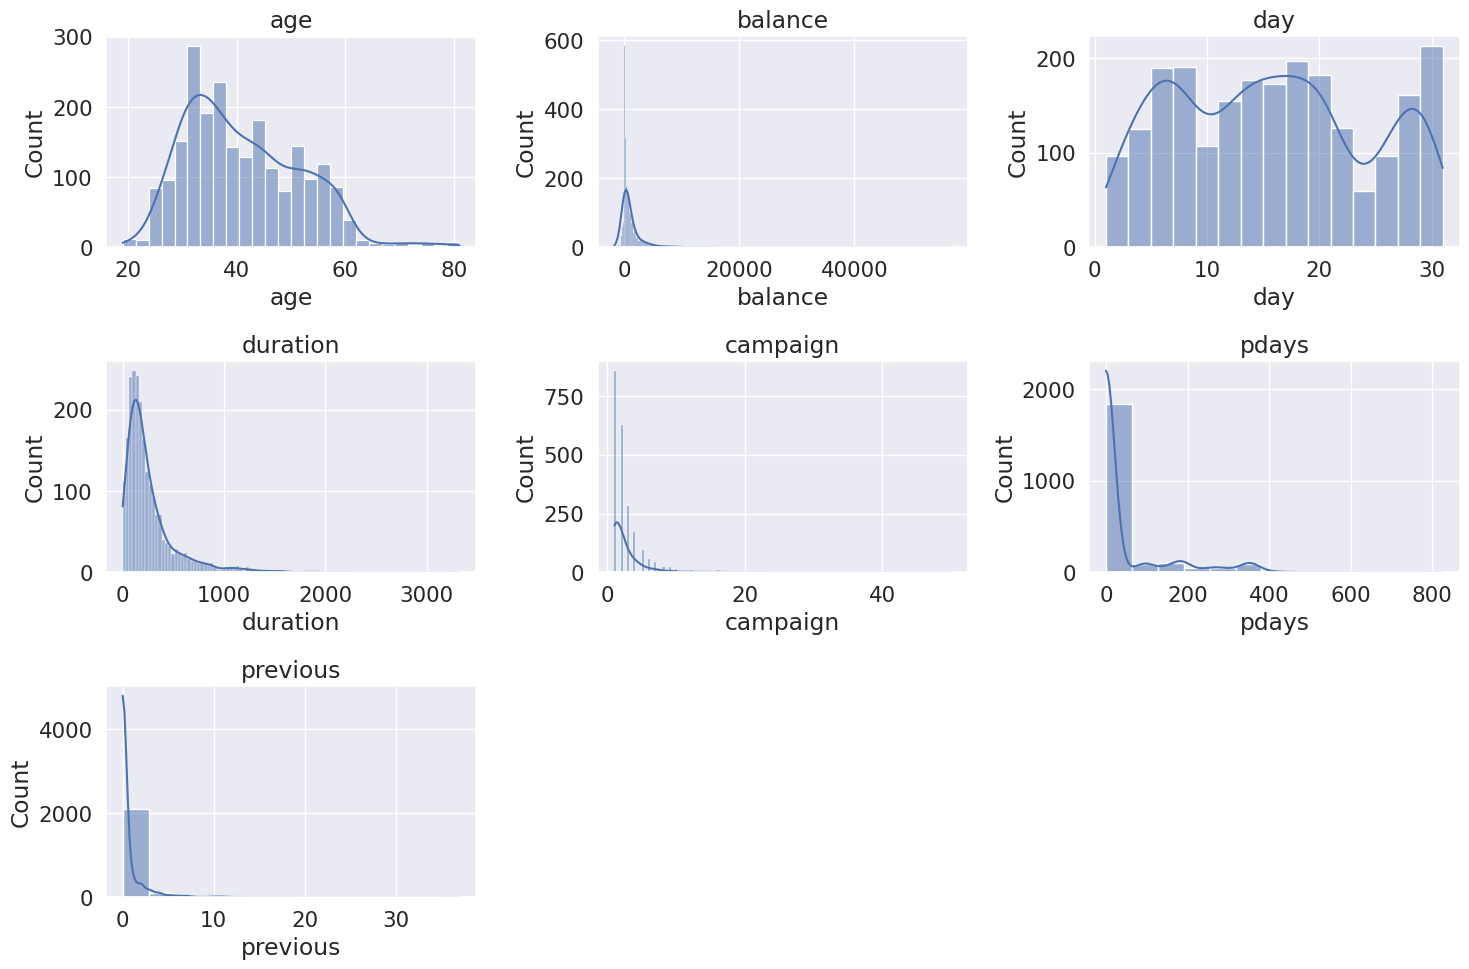

First 5 rows of the DataFrame after scaling numerical values:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
0,0.556596,no,-0.518814,yes,yes,1.327940,-0.560075,2.096302,-0.417362,-0.289877,...,False,False,False,False,False,False,False,False,False,True
1,0.086536,no,-0.417939,no,no,1.210657,-0.310278,4.447963,-0.417362,-0.289877,...,False,False,False,False,False,False,False,False,False,True
2,-1.511666,no,-0.368622,no,no,-1.604136,0.446568,-0.591311,1.436654,1.180851,...,False,False,False,False,False,False,False,True,True,False
3,0.744619,no,-0.332435,no,no,-0.783155,-0.891894,0.752496,-0.417362,-0.289877,...,False,False,False,False,False,False,False,False,False,True
4,-1.511666,no,-0.488712,yes,no,0.858808,-0.045569,-0.591311,-0.417362,-0.289877,...,False,False,False,False,True,False,False,False,False,True


In [5]:
## Your code for LP 4 goes here.
## Visualize the distributions of numerical columns to justify scaler choice

import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(bank_data_encoded[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target variable 'y' if already numeric/boolean)
# We will scale the numerical columns from the one-hot encoded dataframe
# Ensure 'y' is not included if it's the target
numerical_cols_to_scale = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
bank_data_encoded[numerical_cols_to_scale] = scaler.fit_transform(bank_data_encoded[numerical_cols_to_scale])

print("First 5 rows of the DataFrame after scaling numerical values:")
display(bank_data_encoded.head())





In [6]:
## Your code to save the dataframe to a csv file goes here.

# Save the cleaned DataFrame to a CSV file
bank_data_encoded.to_csv('/content/drive/MyDrive/Colab/bank_clean.csv', index=False)

print("Cleaned dataset saved to bank_clean.csv")


Cleaned dataset saved to bank_clean.csv


In [7]:
## Validate no more missing values are present

print("Checking for missing values in the cleaned and scaled dataset:")
print(bank_data_encoded.isnull().sum())

# Optionally, assert that there are no missing values
# assert bank_data_encoded.isnull().sum().sum() == 0, "There are still missing values in the dataset!"
# print("\nValidation successful: No missing values found in the dataset.")

Checking for missing values in the cleaned and scaled dataset:
age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_bluecollar         0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_selfemployed       0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_m              0
marital_mairied        0
marital_maried         0
marital_marirred       0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
contact_telephone      0
contact_unknown        0
month_22-Aug           0
month_27-Aug           0
month_28-Jul           0
month_8-Aug            0
month_August

[HP 2] What is the average duration of calls made in the month of November? Plot a histogram of call duration in the month of November.

The average duration of calls made in November is: 287.82 seconds


/tmp/ipython-input-2453127630.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  november_calls['duration'] = pd.to_numeric(november_calls['duration'], errors='coerce')


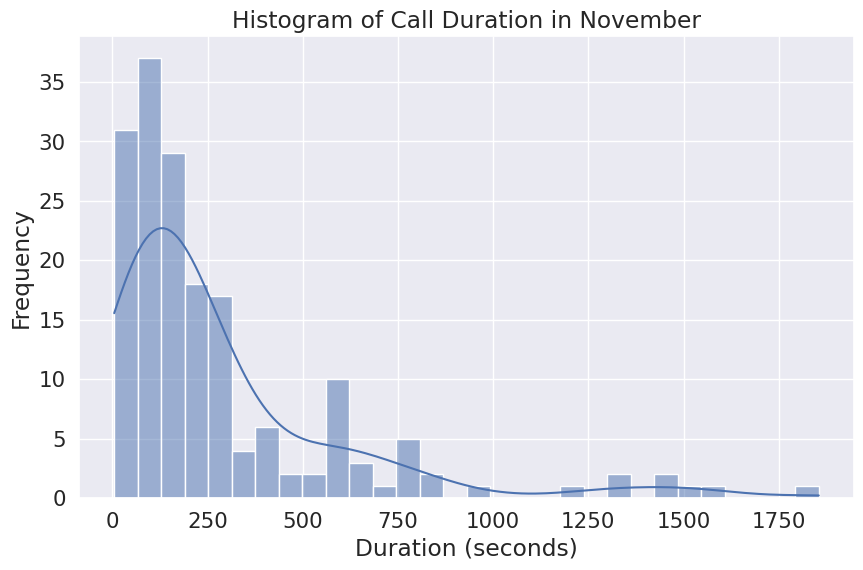

In [8]:
## Your code for HP 2 goes here.
# HP 2: Average duration of calls in November and histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'month' column is in the dataframe and is of string type for filtering
# Use the original bank_data before one-hot encoding for easier month filtering
# Assuming 'bank_data' from previous steps is available and has the 'month' column
if 'month' in bank_data.columns and 'duration' in bank_data.columns:
    # Filter data for the month of November
    november_calls = bank_data[bank_data['month'] == 'nov']

    # Calculate the average duration for November calls
    # Ensure 'duration' is numeric, coercing errors just in case
    november_calls['duration'] = pd.to_numeric(november_calls['duration'], errors='coerce')
    average_duration_november = november_calls['duration'].mean()

    print(f"The average duration of calls made in November is: {average_duration_november:.2f} seconds")

    # Plot a histogram of call duration in November
    plt.figure(figsize=(10, 6))
    sns.histplot(november_calls['duration'].dropna(), kde=True, bins=30)
    plt.title('Histogram of Call Duration in November')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Required columns ('month' or 'duration') not found in the dataframe.")

[HP 3] How many times on an average were customers whose "poutcome" was "success" contacted previously ("previous" column contains this information)? How does this compare to the customers whose "poutcome" was "failure" or "other"? What insight does this step provide for the business objective of having a successful campaign?

In [9]:
## Your code for HP 3 goes here.
# HP 3: Analyze average previous contacts based on poutcome

# Group the data by 'poutcome' and calculate the mean of the 'previous' column
# Using the original bank_data DataFrame before encoding and scaling for easier interpretation of 'poutcome'
if 'poutcome' in bank_data.columns and 'previous' in bank_data.columns:
    # Ensure 'previous' is numeric
    bank_data['previous'] = pd.to_numeric(bank_data['previous'], errors='coerce')

    average_previous_by_poutcome = bank_data.groupby('poutcome')['previous'].mean()

    print("Average number of previous contacts by poutcome:")
    print(average_previous_by_poutcome)

    # Calculate the overall average for comparison
    overall_average_previous = bank_data['previous'].mean()
    print(f"\nOverall average number of previous contacts: {overall_average_previous:.2f}")

else:
    print("Required columns ('poutcome' or 'previous') not found in the dataframe.")

Average number of previous contacts by poutcome:
poutcome
failure    2.984064
success    2.762500
unknown    0.188021
Name: previous, dtype: float64

Overall average number of previous contacts: 0.59


In summary, the analysis shows that customers with a known previous outcome ('success' or 'failure') had a significantly higher average number of previous contacts compared to those with an 'unknown' outcome. This suggests that prior engagement is a key factor, and the 'unknown' group represents a large segment with less contact history that might require a different approach in the current campaign.

# References
Include ALL your references here.

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository
3. The bank_clean.csv file

